# Logbook 0: Danny Phan (21001091)

## Euler Method and Velocity Verlet (11/03/2023)

This is Logbook 0, which for all intents and purposes will just be a complete copy and paste of my Assignment 4 for the Euler Method and Velocity Verlet for the two body situation.

No new discoveries are here, for the first 'real' entry, please go to the next logbook.



In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Ordinary Differential Equations of Gravitational Orbits
## Danny Phan (21001091)

In this assignment, we will be numerically solving two simple gravitational orbits, by applying Euler's method and the velocity Verlet method respectively. 

For the first problem, we will be looking at a smaller mass in orbit of a much larger mass, fixing the larger mass in position. For the second problem, the two bodies will be closer in mass.

In general, we have that the gravitational force on a mass $m_1$ 

$$ \vec{F_1} = \frac{G m_1 m_2}{r_{12}^3} \vec{r_{12}} $$

where $\vec{r_{12}} = \vec{r_2} - \vec{r_1}, r_{12} = |\vec{r_{12}}|, G := 1$, and total angular momentum and energy are conserved.

# Using the Euler method:

First, we will have to define a variable for the force, using the equation given above, and some NumPy.

In [2]:
def force(m1, m2, r1, r2):
    """
    Returns the force acting on m1 due to m2
    inputs:
    m1    mass of body 1
    m2    mass of body 2
    r1    radius of body 1
    r2    radius of body 2
    outputs:
    f     the force acting on m1 due to m2  
    """
   
    r_12 = r2 - r1
   
    r_12_mag = np.linalg.norm(r_12) ** 3
    
    np.seterr(divide='ignore', invalid='ignore')
    
    f = (m1 * m2 * r_12) / r_12_mag
    
    return f
    

In calculating the initial velocity of $m_1$, we use the fact that it's in orbit

$$ \frac{m_1v_1^2}{r} = \frac{Gm_1m_2}{r^2} $$

To get

$$ v_1 = \sqrt{\frac{Gm_2}{r}} = \sqrt{\frac{1 \cdot 1}{1}} = 1 $$

As this is circular motion, the direction of velocity will be perpendicular to the direction of acceleration. We'll set the initial locations of $m_2$ to be at the origin and $m_1$ to be a radius of 1 away from it horizontally.

In [3]:
# Initial Parameters

G = 1
m1 = 0.0001
m2 = 1.0
Ndim = 2
radius_orbit = 1 

N_steps = 120000 # From some testing, this is about two orbits
dt = 1e-4

# Defining variables

r1 = np.zeros((N_steps,Ndim))
r2 = np.zeros((N_steps,Ndim))
v1 = np.zeros((N_steps,Ndim))
v2 = np.zeros((N_steps,Ndim))

ke1 = np.zeros(N_steps)
ke2 = np.zeros(N_steps)
pe1 = np.zeros(N_steps)
pe2 = np.zeros(N_steps)

l1 = np.zeros((N_steps,Ndim))
# Initial Conditions

r1[0] = np.array([radius_orbit,0])
v1[0] = np.array([0,1])
ke1[0] = 0.5 * m1 * 1
l1[0] = m1 * np.cross(r1[0], v1[0]) 
pe1[0] = - G*m1*m2/np.linalg.norm(r1[0]-r2[0])


To set up the Euler solving algorithm, we will first turn the second order differential equation into a pair of couple first order ODEs

$$ \vec{F_1} = \frac{Gm_1m_2}{r_{12}^3} \vec{r_{12}} $$

$$ m_1 \frac{d^2\vec{r_{12}}}{dt^2} = \frac{Gm_1m_2}{r_{12}^3} \vec{r_{12}} $$

$$ \frac{d^2\vec{r_{12}}}{dt^2} = \frac{Gm_2}{r_{12}^3} \vec{r_{12}} $$

Decoupling

$$ \frac{d\vec{r_{12}}}{dt} = \vec{v_{12}}$$
$$ \frac{d\vec{v_{12}}}{dt} = \frac{\vec{F}}{m_1} = \frac{Gm_2}{r_{12}^3}\vec{r_{12}} $$

So we can say that $\Delta \vec{r} = \vec{v}\Delta t$ and $\Delta \vec{v} = \vec{F}\Delta t / m $ 

In [4]:
%%time
r_12 = r2 - r1

r_12_mag = np.linalg.norm(r_12)

for i in range(N_steps - 1):
    
    r1[i+1] = r1[i] + v1[i] * dt
    
    v1[i+1] = v1[i] + (force(m1, m2, r1[i], r2[i]))/m1 * dt # This calls the function quite a few times
    

CPU times: total: 1.89 s
Wall time: 1.83 s


Text(0, 0.5, 'y')

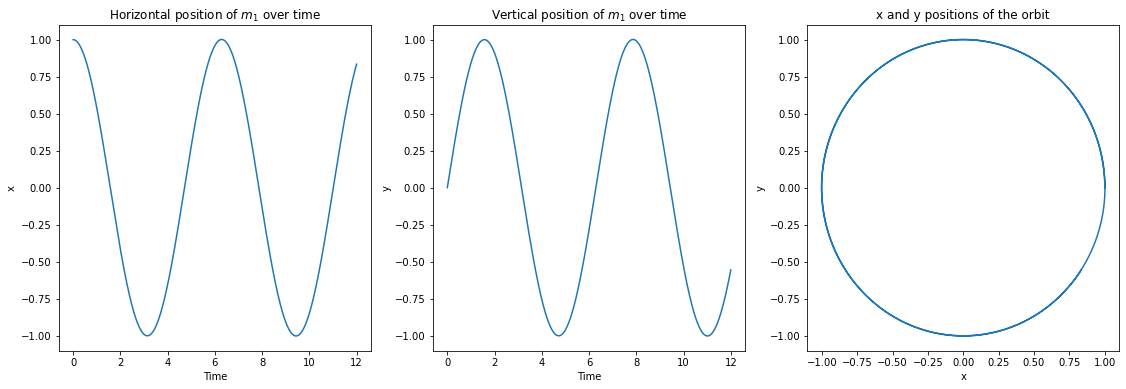

In [5]:
tarr = np.arange(0, N_steps * dt, dt)


figs, ax = plt.subplots(1,3, figsize = (19,6))
ax[0].plot(tarr, r1[:,0])
ax[0].set_title(r"Horizontal position of $m_1$ over time")
ax[0].set_xlabel("Time")
ax[0].set_ylabel("x")


ax[1].plot(tarr, r1[:,1])
ax[1].set_title(r"Vertical position of $m_1$ over time")
ax[1].set_xlabel("Time")
ax[1].set_ylabel("y")

ax[2].plot(r1[:,0], r1[:,1])
ax[2].set_title(r"x and y positions of the orbit")
ax[2].set_xlabel("x")
ax[2].set_ylabel("y")

In [6]:
%%time
    
for i in range(N_steps - 1): # Will be using a lot of np.linalg.norm
       
    ke1[i+1] = 0.5 *m1 * np.linalg.norm(v1[i+1])**2
    pe1[i+1] = - G*m1*m2/np.linalg.norm(r1[i+1]-r2[i+1])
    l1[i+1] =  m1 * np.cross(r1[i+1], v1[i+1])

CPU times: total: 4.47 s
Wall time: 5.03 s


Text(0, 0.5, 'L')

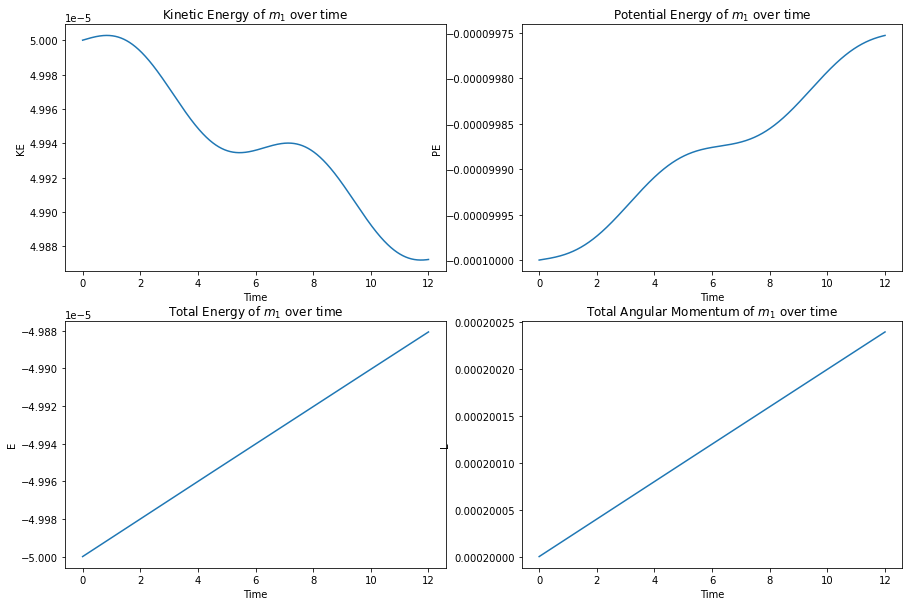

In [7]:
# New figure

figs2, ax2 = plt.subplots(2,2, figsize = (15,10))


ax2[0,0].plot(tarr, ke1)
ax2[0,0].set_title(r"Kinetic Energy of $m_1$ over time")
ax2[0,0].set_xlabel("Time")
ax2[0,0].set_ylabel("KE")

ax2[0,1].plot(tarr, pe1)
ax2[0,1].set_title(r"Potential Energy of $m_1$ over time")
ax2[0,1].set_xlabel("Time")
ax2[0,1].set_ylabel("PE")

ax2[1,0].plot(tarr, pe1+ke1)
ax2[1,0].set_title(r"Total Energy of $m_1$ over time")
ax2[1,0].set_xlabel("Time")
ax2[1,0].set_ylabel("E")

ax2[1,1].plot(tarr, l1[:,0] + l1[:,1])
ax2[1,1].set_title(r"Total Angular Momentum of $m_1$ over time")
ax2[1,1].set_xlabel("Time")
ax2[1,1].set_ylabel("L")


The formula for angular momentum is

$$ \vec{L} = m \vec{v} \times \vec{r} $$

Since total angular momentum is conserved we should expect it to be constant, however the plot that is computed is still slightly linear, even though it should be a horizontal line. 

It was previously stated that total energy and total angular momentum should be conserved, but as one can see in the plots, these aren't conserved, and are slightly linear. In addition, the individual kinetic and potential energy plots are sinusoidal, although small in magnitude.

The velocity Verlet might be more accurate.

# The velocity Verlet

The positions and velocities in this algorithm are given by

$$ x(t \Delta t) = x(t) + \Delta t v(t) + \Delta t^2 \frac{F(t)}{2m} $$

$$ v(t \Delta t) = v(t) + \Delta t \frac{F(t) + F(t + \Delta t)}{2m} $$

We will set the new mass variables to be similar to each other, and they will orbit around their centre of mass radius, 

$$\vec{r}_{CoM} = \frac{m_1 \vec{r_1} + m_2 \vec{r_2}}{m_1+m_2}$$

which we will set as the origin. The distance between their bodies will be set as $x_1 + x_2 = 1$, so with $\vec{r}_{CoM} = \vec{0}$, we have that 

$$ \vec{0} = \frac{m_1}{m_1+m_2} \begin{pmatrix} x_1 \\ y_1 \end{pmatrix} + \frac{m_2}{m_1+m_2} \begin{pmatrix} x_2 \\ y_2 \end{pmatrix}$$

If we set $\frac{m_1}{m_1+m_2} = \alpha, \frac{m_2}{m_1+m_2} = \beta$ for convenience

$$ \vec{0} = \begin{pmatrix} \alpha x_1 \\ \alpha y_1 \end{pmatrix} + \begin{pmatrix} \beta x_2 \\ \beta y_2 \end{pmatrix}$$

We will write out the linear equations, and by aligning the masses along the x-axis we may ignore the y-components

$$\alpha x_1 + \beta x_2 = 0$$

and by subsituting $x_1 + x_2 = 1 \implies x_1 = 1 - x_2$, we arrive at

$$ x_2 = - \frac{\alpha}{\beta - \alpha} , \, \therefore x_1=  \frac{\beta}{\beta - \alpha} $$

The initial velocities follow from the previous case, 

$$\frac{m_1v_1^2}{r_1} = \frac{Gm_1m_2}{r_{12}^2} $$

$$\frac{m_1v_2^2}{r_1} = \frac{Gm_1m_2}{r_{12}^2} $$

such that

$$ v_1 = \sqrt{\frac{Gm_2}{r_{12}^2}r_1} $$

$$ v_2 = \sqrt{\frac{Gm_1}{r_{12}^2}r_2} $$

with $r_1$ being the distance from the first body to the origin and $r_{12}$ the distance between the two bodies

In [8]:
# New parameters and variables

M1 = 10
M2 = 1

N_steps = 60000 # This takes a while but otherwise my orbits are incomplete

R1 = np.zeros((N_steps, Ndim))
R2 = np.zeros((N_steps, Ndim))
V1 = np.zeros((N_steps, Ndim))
V2 = np.zeros((N_steps, Ndim))

# Energies and Angular Momenta

KE1 = np.zeros(N_steps)
KE2 = np.zeros(N_steps)
PE1 = np.zeros(N_steps)
PE2 = np.zeros(N_steps)

L1 = np.zeros(N_steps)
L2 = np.zeros(N_steps) 

# Using the above formula to find the separation between the masses

alpha = M1/(M1+M2)
beta = M2/(M1+M2)

if M1 - M2 < 1e-7: # If they're the same mass, I just put them an equal distance away to avoid a div0 error
    R2[0] = np.array([-1,0])
    R1[0] = np.array([1,0])
else:
    R2[0] = np.array([-alpha/(beta-alpha),0])
    R1[0] = np.array([beta/(beta-alpha),0])

# Calculating the initial velocities, angular momenta, and energies
    
R_12 = np.linalg.norm(R2-R1)

V1_initial = np.sqrt((G * M2 * np.linalg.norm(R1[0])) / (R_12**2))
V2_initial = np.sqrt((G * M1 * np.linalg.norm(R2[0])) / (R_12**2))

V1[0] = np.array((0,V1_initial))
V2[0] = np.array((0,-V2_initial)) 


L1[0] = M1 * np.cross(R1[0], V1[0])
L2[0] = M2 * np.cross(R2[0], V2[0])
KE1[0] = 0.5 * M1 * np.linalg.norm(V1[0])**2
PE1[0] =  -G*M1*M2/np.linalg.norm(R1[0]-R2[0])
KE2[0] = 0.5 * M2 * np.linalg.norm(V2[0])**2
PE2[0] =  -G*M1*M2/np.linalg.norm(R1[0]-R2[0])

In [9]:
%%time

# Implementing Verlet Algorithm, this takes 11 seconds on my PC

for i in range(N_steps - 1):
    
    F_1 = force(M1, M2, R1[i], R2[i]) # This reduces the number of times I have to call force()
    
    R1[i+1] = R1[i] + dt * V1[i] + (dt**2 * (F_1)/(2*M1))
    R2[i+1] = R2[i] + dt * V2[i] + (dt**2 * (-F_1/(2*M2)))
    
    F_2 = force(M1, M2, R1[i+1], R2[i+1]) # This has to go after R1[i+1] and R2[i+1] are defined!
    
    V1[i+1] = V1[i] + dt * (F_1 + F_2) / (2*M1)
    V2[i+1] = V2[i] + dt * (-F_1 -F_2) / (2*M2) 


CPU times: total: 2.34 s
Wall time: 2.63 s


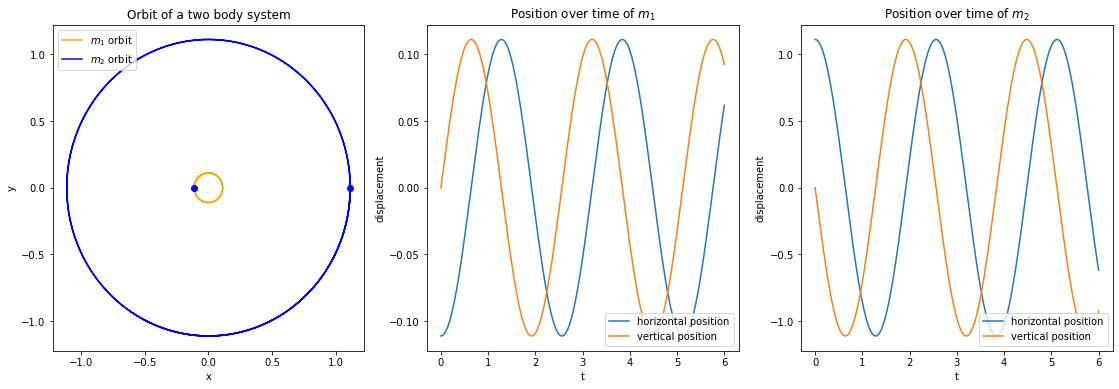

In [10]:
# Plotting the orbits
tarr = np.arange(0, N_steps * dt, dt)
fig3, ax3s = plt.subplots(1,3,figsize = (19,6))
ax3s[0].set_title("Orbit of a two body system")
ax3s[0].plot(R1[:,0], R1[:,1], label = r"$m_1$ orbit", color = 'orange')
ax3s[0].plot(R2[:,0], R2[:,1], label = r"$m_2$ orbit", color = 'blue')
ax3s[0].plot(R1[0,0],R1[0,1], 'bo')
ax3s[0].plot(R2[0,0],R2[0,1], 'bo')
ax3s[0].set_xlabel("x")
ax3s[0].set_ylabel("y")
ax3s[0].legend()


ax3s[1].set_title(r"Position over time of $m_1$")
ax3s[1].plot(tarr, R1[:,0], label = "horizontal position")
ax3s[1].plot(tarr, R1[:,1], label = "vertical position")
ax3s[1].set_xlabel("t")
ax3s[1].set_ylabel("displacement")
ax3s[1].legend(loc = 'lower right')


ax3s[2].set_title(r"Position over time of $m_2$")
ax3s[2].plot(tarr, R2[:,0], label = "horizontal position")
ax3s[2].plot(tarr, R2[:,1], label = "vertical position")
ax3s[2].set_xlabel("t")
ax3s[2].set_ylabel("displacement")
ax3s[2].legend(loc = 'lower right')

In [11]:
%%time

# This can take quite a bit of time depending on the computer and N_steps

for i in range(N_steps - 1):
    
    normalised_R_12 = np.linalg.norm(R1[i+1]-R2[i]) # This function would otherwise be called twice
    
    KE1[i+1] = 0.5 * M1 * np.linalg.norm(V1[i+1])**2
    PE1[i+1] = - G*M1*M2/normalised_R_12
    L1[i+1] =  M1 * np.cross(R1[i+1], V1[i+1])
  
    KE2[i+1] = 0.5 * M2 * np.linalg.norm(V2[i+1])**2
    PE2[i+1] = - G*M1*M2/normalised_R_12
    L2[i+1] =  M2 * np.cross(R2[i+1], V2[i+1])


CPU times: total: 4.12 s
Wall time: 4.59 s


Text(0, 0.5, 'Energy')

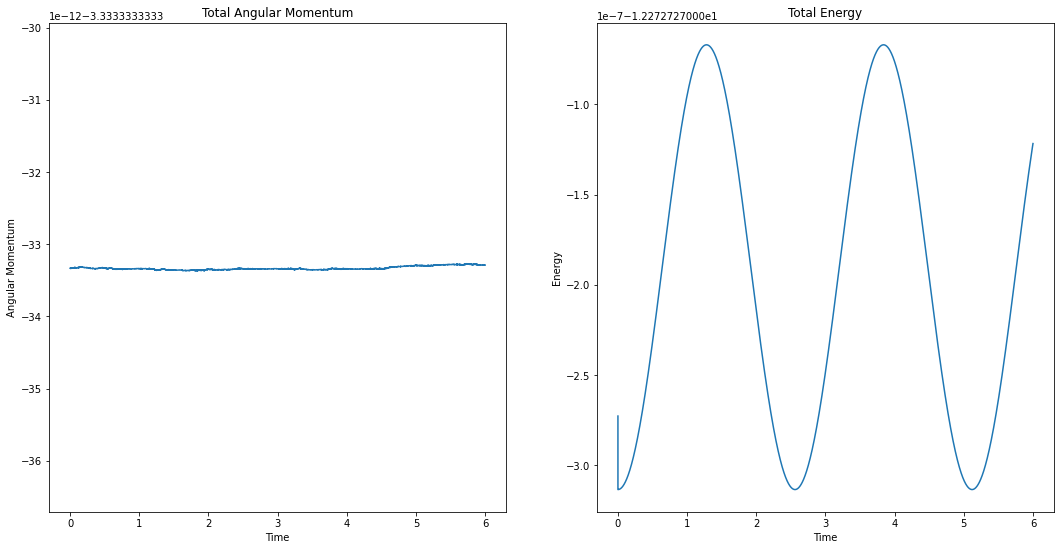

In [12]:
fig4, ax4s = plt.subplots(1,2, figsize = (18,9))

ax4s[0].set_title("Total Angular Momentum")
ax4s[0].plot(tarr,L1+L2)
ax4s[0].set_xlabel("Time")
ax4s[0].set_ylabel("Angular Momentum")

ax4s[1].set_title("Total Energy")
ax4s[1].plot(tarr, PE1+PE2+KE1+KE2)
ax4s[1].set_xlabel("Time")
ax4s[1].set_ylabel("Energy")


As you can see, the total angular momentum and total energy is now conserved, as should be expected (the scale in the second plot is of order $1 \times 10 ^{-7}$.

$$ L_1 + L_2 = constant$$

$$ E_1 = T_1 + U_1 $$

$$ E_2 = T_2 + U_2 $$

$$ \implies E_{tot} = E_1 + E_2 = constant$$

This means that this method is more accurate than the previous Euler method, since we have conservation. However, the computational time for the Verlet algorithm vs Euler is longer, due to the fact that we now have to calculate velocities and positions for both bodies, and the fact we call the ```force()``` function more often. The Verlet algorithm takes $\sim$11 seconds, whereas Euler's takes $\sim$2 seconds. Therefore, using Euler's method would trade accuracy for faster computational speeds, and Verlet would provide the opposite idea.

In conclusion, I'm now able to understand how to use Euler and Verlet's algorithms to solve differential equations, and in the exercises, I have learned how to use Runge-Kutta and mid-point solvers, as well as SciPy's in-library functions. 

This concludes the zeroth logbook.